<span style="font-size: 20px; font-weight: bold;">Importing necessary libraries and seeding for reproducibility of the solution</span>


In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans

np.random.seed(0)

<span style="font-size: 20px; font-weight: bold;">Reading the Data File</span>


In [2]:
df = pd.read_excel("Indigo_Fleet.xlsx",index_col=False)
orgCounter = {}
countList = []

for i, r in df.iterrows():
    if r['ORIGIN'] not in orgCounter:
        orgCounter[r['ORIGIN']] = 1
        
    elif r['ORIGIN'] in orgCounter:
        orgCounter[r['ORIGIN']] += 1
        
for key, value in orgCounter.items():
    if [0,value] not in countList:
        countList.append([0,value])

<span style="font-size: 20px; font-weight: bold;">Defining the number of clusters and deploying K means clustering algorithm with K = 9</span>


In [3]:
clusters = 9
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(countList)
print(countList)
print (kmeans.labels_)
labelsList = np.array(kmeans.labels_)

C:\Users\Dhawal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dhawal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[0, 8], [0, 27], [0, 2], [0, 4], [0, 1], [0, 9], [0, 90], [0, 7], [0, 14], [0, 6], [0, 17], [0, 142], [0, 3], [0, 22], [0, 20], [0, 104], [0, 12], [0, 21], [0, 87], [0, 5], [0, 23], [0, 108], [0, 16], [0, 10], [0, 13], [0, 15]]
[0 8 5 5 5 0 4 0 7 0 6 2 5 3 3 1 7 3 4 5 3 1 6 0 7 6]


In [4]:
clusterOrg = {}
clusterRank = {}
clusterCount = {}
clusterAvg = {}
sortedList = []
for i in range(clusters):
    if i not in clusterOrg and i+1 not in clusterRank and i not in clusterCount and i not in clusterAvg:
        clusterOrg[i] = []
        clusterRank[i+1] = []
        clusterCount[i] = []
        clusterAvg[i] = 0
        
        
cc = 0
for i in labelsList:
    for key, value in orgCounter.items():
        if value == countList[cc][1]:
            clusterOrg[i].append(key)
            clusterCount[i].append(value)
    cc+=1

for key, value in clusterCount.items():
    clusterAvg[key] = sum(value)/len(value)
    sortedList.append(sum(value)/len(value))

sortedList = sorted(sortedList)
print(orgCounter)
print(clusterOrg)
print(clusterAvg)
print(sortedList)

{'Agartala (IXA)': 8, 'Ahmedabad (AMD)': 27, 'Aizawl (AJL)': 2, 'Amritsar (ATQ)': 4, 'Aurangabad (IXU)': 1, 'Bagdogra (IXB)': 9, 'Belgaum (IXG)': 1, 'Bengaluru (BLR)': 90, 'Bhopal (BHO)': 7, 'Bhubaneshwar (BBI)': 14, 'Chandigarh (IXC)': 6, 'Chennai (MAA)': 90, 'Coimbatore (CJB)': 17, 'Dehradun (DED)': 1, 'Delhi (DEL)': 142, 'Dibrugarh (DIB)': 3, 'Dimapur (DMU)': 1, 'GAYA (GAY)': 1, 'Goa (GOI)': 22, 'Gorakhpur (GOP)': 4, 'Guwahati (GAU)': 20, 'Hubli (HBX)': 4, 'Hyderabad (HYD)': 104, 'Imphal (IMF)': 2, 'Indore (IDR)': 12, 'Jaipur (JAI)': 14, 'Jammu (IXJ)': 2, 'Jodhpur (JDH)': 6, 'Kannur (CNN)': 7, 'Kochi (COK)': 21, 'Kolhapur (KLH)': 2, 'Kolkata (CCU)': 87, 'Kozhikode (CCJ)': 5, 'Lucknow (LKO)': 23, 'Madurai (IXM)': 9, 'Mangalore (IXE)': 8, 'Mumbai (BOM)': 108, 'Nagpur (NAG)': 12, 'Patna (PAT)': 16, 'Port Blair (IXZ)': 2, 'Prayagraj (IXD)': 5, 'Pune (PNQ)': 17, 'Raipur (RPR)': 14, 'Rajahmundry (RJA)': 7, 'Ranchi (IXR)': 10, 'Shirdi (SAG)': 2, 'Silchar (IXS)': 1, 'Srinagar (SXR)': 3, 'Su

In [5]:
rr = 1
for s in sortedList:
    cc=0
    for key, value in clusterAvg.items():
        if value == s:
            clusterRank[rr] = clusterOrg[cc]
        cc+=1
    rr+=1
            
print(sortedList)
print(clusterRank)

#Keep track of max and min count of each cluster

[2.5454545454545454, 7.666666666666667, 13.166666666666666, 16.25, 21.5, 27.0, 89.0, 106.0, 142.0]
{1: ['Aizawl (AJL)', 'Imphal (IMF)', 'Jammu (IXJ)', 'Kolhapur (KLH)', 'Port Blair (IXZ)', 'Shirdi (SAG)', 'Tuticorin (TCR)', 'Amritsar (ATQ)', 'Gorakhpur (GOP)', 'Hubli (HBX)', 'Surat (STV)', 'Tirupati (TIR)', 'Aurangabad (IXU)', 'Belgaum (IXG)', 'Dehradun (DED)', 'Dimapur (DMU)', 'GAYA (GAY)', 'Silchar (IXS)', 'Dibrugarh (DIB)', 'Srinagar (SXR)', 'Kozhikode (CCJ)', 'Prayagraj (IXD)'], 2: ['Agartala (IXA)', 'Mangalore (IXE)', 'Vijayawada (VGA)', 'Bagdogra (IXB)', 'Madurai (IXM)', 'Varanasi (VNS)', 'Bhopal (BHO)', 'Kannur (CNN)', 'Rajahmundry (RJA)', 'Tiruchirappalli (TRZ)', 'Udaipur (UDR)', 'Vadodara (BDQ)', 'Chandigarh (IXC)', 'Jodhpur (JDH)', 'Ranchi (IXR)'], 3: ['Bhubaneshwar (BBI)', 'Jaipur (JAI)', 'Raipur (RPR)', 'Indore (IDR)', 'Nagpur (NAG)', 'Thiruvananthapuram (TRV)'], 4: ['Coimbatore (CJB)', 'Pune (PNQ)', 'Patna (PAT)', 'Visakhapatnam (VTZ)'], 5: ['Goa (GOI)', 'Guwahati (GAU)', 

<span style="font-size: 20px; font-weight: bold;">Systematic scheme for Delay Data Generation for Dynamic Programming Approach and the distribution scheme defined here is also used in the Reinforcement Learning Framework to capture uncertainties in the occurrence of delay. For each cluster shape and scale is defined by the mean and variance as discussed in the Section 7.2.2 of the paper.</span>


In [6]:
maxDelay = 3000
maxRangeStep = {}
countStep = 0
for i in range(clusters):
    if i < clusters-1:
        if i not in maxRangeStep:
            maxRangeStep[i] = (countStep, countStep + math.floor(maxDelay/clusters))
            countStep+=math.floor(maxDelay/clusters)
    if i == clusters-1:
        maxRangeStep[i] = (countStep, maxDelay)        
        
print(maxRangeStep)

{0: (0, 333), 1: (333, 666), 2: (666, 999), 3: (999, 1332), 4: (1332, 1665), 5: (1665, 1998), 6: (1998, 2331), 7: (2331, 2664), 8: (2664, 3000)}


In [7]:
#logic: If the flight leg belongs to the first cluster,
#then the flight leg will be assigned the priority majorly from the first range
#occassionaly from any other range.
#hence need to define a skewed normal distribution which will differ for each cluster,
#the mean and the range will differ
#Create a distribution

clusterFlight = {}
clusterFlightabs = {}

for c in range(clusters):
    if c+1 not in clusterFlight and c+1 not in clusterFlightabs:
        clusterFlight[c+1] = []
        clusterFlightabs[c+1] = []

for key, value in clusterRank.items():
    for i, r in df.iterrows():
        if r['ORIGIN'] in value:
            flightLeg = str(r['ORIGIN']) + str("-") + str(r["DEST"])
            clusterFlightabs[key].append(flightLeg)
            if flightLeg not in clusterFlight[key]:
                clusterFlight[key].append(flightLeg)
            
print(clusterFlightabs)

{1: ['Aizawl (AJL)-Guwahati (GAU)', 'Aizawl (AJL)-Kolkata (CCU)', 'Amritsar (ATQ)-Bengaluru (BLR)', 'Amritsar (ATQ)-Delhi (DEL)', 'Amritsar (ATQ)-Kolkata (CCU)', 'Amritsar (ATQ)-Mumbai (BOM)', 'Aurangabad (IXU)-Delhi (DEL)', 'Belgaum (IXG)-Hyderabad (HYD)', 'Dehradun (DED)-Mumbai (BOM)', 'Dibrugarh (DIB)-Delhi (DEL)', 'Dibrugarh (DIB)-Guwahati (GAU)', 'Dibrugarh (DIB)-Kolkata (CCU)', 'Dimapur (DMU)-Kolkata (CCU)', 'GAYA (GAY)-Delhi (DEL)', 'Gorakhpur (GOP)-Delhi (DEL)', 'Gorakhpur (GOP)-Hyderabad (HYD)', 'Gorakhpur (GOP)-Kolkata (CCU)', 'Gorakhpur (GOP)-Prayagraj (IXD)', 'Hubli (HBX)-Bengaluru (BLR)', 'Hubli (HBX)-Chennai (MAA)', 'Hubli (HBX)-Kannur (CNN)', 'Hubli (HBX)-Kochi (COK)', 'Imphal (IMF)-Delhi (DEL)', 'Imphal (IMF)-Guwahati (GAU)', 'Jammu (IXJ)-Delhi (DEL)', 'Jammu (IXJ)-Delhi (DEL)', 'Kolhapur (KLH)-Hyderabad (HYD)', 'Kolhapur (KLH)-Tirupati (TIR)', 'Kozhikode (CCJ)-Bengaluru (BLR)', 'Kozhikode (CCJ)-Chennai (MAA)', 'Kozhikode (CCJ)-Chennai (MAA)', 'Kozhikode (CCJ)-Delhi (DE

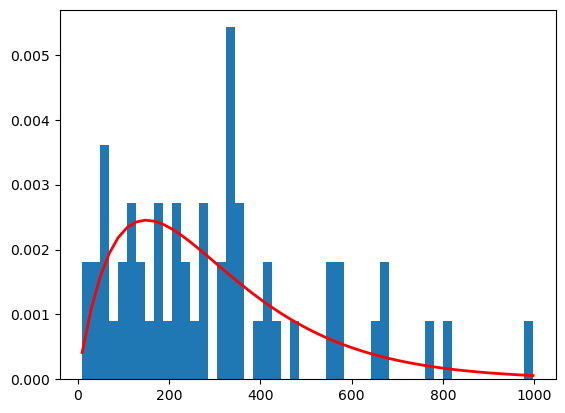

[770.82443645 335.77213677 814.06984116 104.48796668 230.53972948
 338.23950399 428.23004331 274.31025799 346.18078812 320.34255515
 665.29316041 212.33860919   9.89734087 399.13520553 997.44530478
  60.88422542 679.78882093 656.14255988 114.47808894  29.15380196
 571.93909914 562.60617952  96.96070022  63.51515934 163.72387482
 174.40094938  49.6136437  211.02450966 113.5967157  332.65725793
 244.58215053 342.4576968  146.18395121 186.12913614 123.28153211
  42.57137136  48.54740808 350.75228316 419.4342464  275.81849704
 336.28734099 139.45332156 194.39122474 261.03486148  85.44152538
 468.16448414 351.45174607  54.90780832 554.79431473 216.75128719
 179.77067579 569.30530974 325.55466365 413.30759745 275.39055158
 336.20421975]


In [8]:
shape, scale = 2., 150.
fcount = len(clusterFlightabs[1])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))

plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

flag = []
for i in range(len(df)):
    flag.append(0)
    
df['Flag'] = flag

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[1]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
                        
# for i, r in df.iterrows():
#     if r["ARR_DELAY_NEW"] > 0:
#         print(r["ARR_DELAY_NEW"])
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

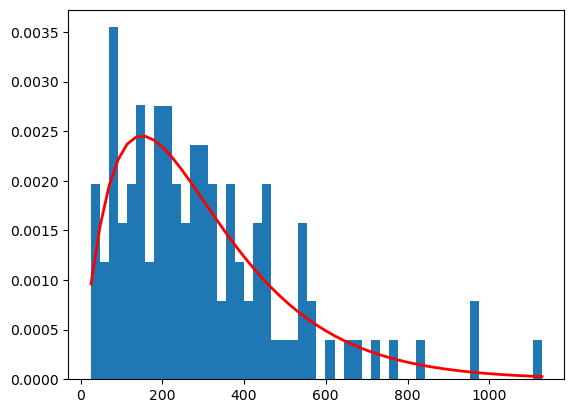

[ 714.92130352  149.26094292  161.03419249   94.46785742  762.95830958
  129.66664896  653.47455827   25.63795854  540.09675157   91.76899826
  218.07393438  115.62398821   91.6967518   543.64954421  468.17315224
  139.59538289  201.62916756  367.4086951   139.14352384  119.44695423
   90.05050695  298.19737299  214.6608688   114.49612717  259.96851521
  145.82222029  273.9980555   389.57963532  312.74923107  187.80302265
  211.69041892  381.67415289  309.48198887  463.56488147  363.06401626
  196.60354999  539.40448089  674.910371    956.99813519   65.3598856
  282.28927705  460.94743492  316.23903457   27.28154824  297.25725642
  428.49997108  209.3705386   213.10373776  290.40027057  273.7613314
  274.34038866  538.71104948  184.14087127  145.58782715  189.14983546
  258.53788591  173.02544275  569.99695569   92.26423339  284.25620016
  422.57707619  107.06107522   67.2284848   316.13133411  324.21243045
   72.25687772  242.58126464   49.49024335  245.26318252  127.92999543
   35.20

In [9]:
shape, scale = 2., 150.
fcount = len(clusterFlightabs[2])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[2]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

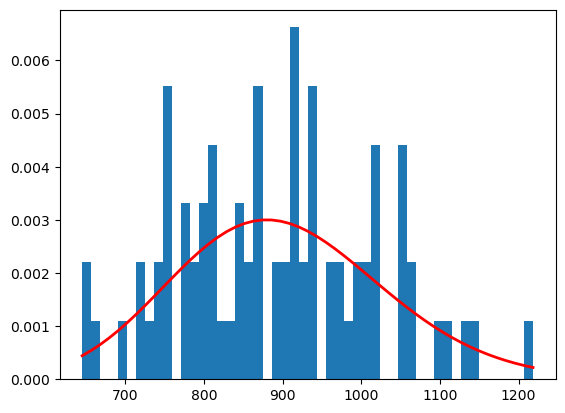

[1128.51849169  814.03174447  824.57803412  757.45180778 1147.44030338
  795.39968115 1103.36597851  645.28748747 1053.61112688  754.23258628
  870.48314297  781.05587859  754.14567478 1055.24646493 1019.23867608
  805.02312606  858.00203409  966.11567368  804.59361248  785.05342684
  752.15460205  925.03456667  867.93595097  779.86235326  900.14183949
  810.86495571  909.49097682  978.39821606  934.05965378  847.07177237
  865.70112599  974.06160897  932.05303619 1016.94686234  963.66367661
  854.07784138 1053.2918403  1112.26959214 1218.47303921  719.36839848
  914.89608848 1015.63990983  936.19072811  649.37873117  924.44354143
  999.10862555  863.943878    866.76655011  920.10232962  909.33538006
  909.71586245 1052.97180913  844.10346816  810.6475959   848.15543124
  899.17344217  834.89025303 1067.20831254  754.8273018   916.16585616
  996.02191102  771.82324009  722.07661924  936.12514685  941.01349097
  729.15544351  888.17102554  694.29636625  890.04691544  793.6745987
  667.2

In [10]:
shape, scale = 45., 20.
fcount = len(clusterFlightabs[3])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[3]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

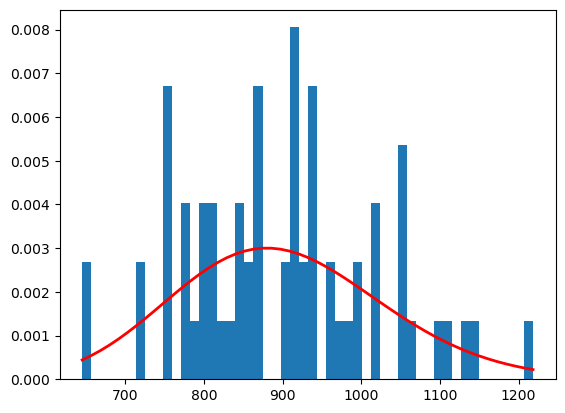

[1128.51849169  814.03174447  824.57803412  757.45180778 1147.44030338
  795.39968115 1103.36597851  645.28748747 1053.61112688  754.23258628
  870.48314297  781.05587859  754.14567478 1055.24646493 1019.23867608
  805.02312606  858.00203409  966.11567368  804.59361248  785.05342684
  752.15460205  925.03456667  867.93595097  779.86235326  900.14183949
  810.86495571  909.49097682  978.39821606  934.05965378  847.07177237
  865.70112599  974.06160897  932.05303619 1016.94686234  963.66367661
  854.07784138 1053.2918403  1112.26959214 1218.47303921  719.36839848
  914.89608848 1015.63990983  936.19072811  649.37873117  924.44354143
  999.10862555  863.943878    866.76655011  920.10232962  909.33538006
  909.71586245 1052.97180913  844.10346816  810.6475959   848.15543124
  899.17344217  834.89025303 1067.20831254  754.8273018   916.16585616
  996.02191102  771.82324009  722.07661924  936.12514685  941.01349097]


In [11]:
shape, scale = 45., 20.
fcount = len(clusterFlightabs[4])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)
            
# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[4]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1
# df.drop('Flag', inplace=True, axis=1)                       
# df.to_excel("testDataDay1_AA_150_revised_withdelay.xlsx")

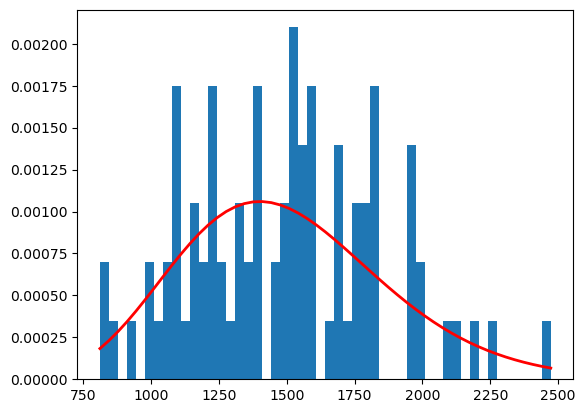

[2180.83832847 1244.63524628 1273.54863824 1092.93173265 2241.49471475
 1194.03459101 2100.89282594  810.70957427 1945.12451157 1084.47891482
 1401.61778233 1155.50608462 1084.25098243 1950.1928998  1839.42663839
 1220.09250964 1366.44688487 1679.29751283 1218.92595796 1166.20604293
 1079.03318962 1558.28519223 1394.41911197 1152.31715343 1486.21072979
 1235.99138989 1513.16699226 1715.9628326  1584.65271069 1335.85897535
 1388.11201046 1702.9923678  1578.77948224 1832.43642283 1672.00424264
 1355.44216341 1944.13536425 2129.10200111 2472.99941636  994.22217825
 1528.81389086 1828.45336319 1590.89690651  820.53518297 1556.56280893
 1778.2780109  1383.15850249 1391.11781473 1543.92797811 1512.71724008
 1513.81709066 1943.14404628 1327.58698373 1235.39874858 1338.88259496
 1483.42642802 1302.00714446 1987.37369277 1086.03899123 1532.49624658
 1768.95176643 1130.90641115 1001.14737695 1590.70464623 1605.05329711
 1019.31779408 1451.89727024  930.81743722 1457.25927571 1189.38110162
  863.

In [12]:
shape, scale = 15, 100.
fcount = len(clusterFlightabs[5])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)

# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[5]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

# print(df["ARR_DELAY_NEW"])
                        
# df.to_excel("testDataDay1_AA_20_revised_withdelay.xlsx")

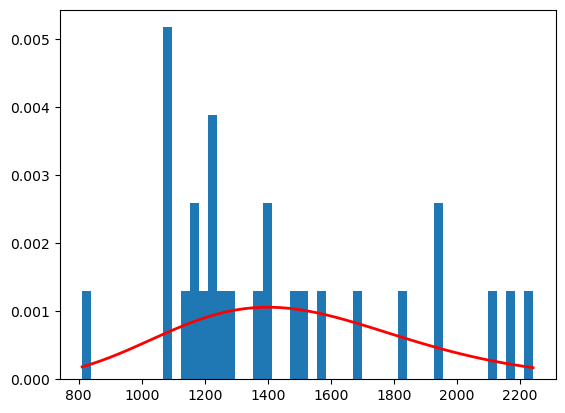

[2180.83832847 1244.63524628 1273.54863824 1092.93173265 2241.49471475
 1194.03459101 2100.89282594  810.70957427 1945.12451157 1084.47891482
 1401.61778233 1155.50608462 1084.25098243 1950.1928998  1839.42663839
 1220.09250964 1366.44688487 1679.29751283 1218.92595796 1166.20604293
 1079.03318962 1558.28519223 1394.41911197 1152.31715343 1486.21072979
 1235.99138989 1513.16699226]


In [13]:
shape, scale = 15, 100.
fcount = len(clusterFlightabs[6])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)

# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[6]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

# print(df["ARR_DELAY_NEW"])
                        
# df.to_excel("testDataDay1_AA_20_revised_withdelay.xlsx")

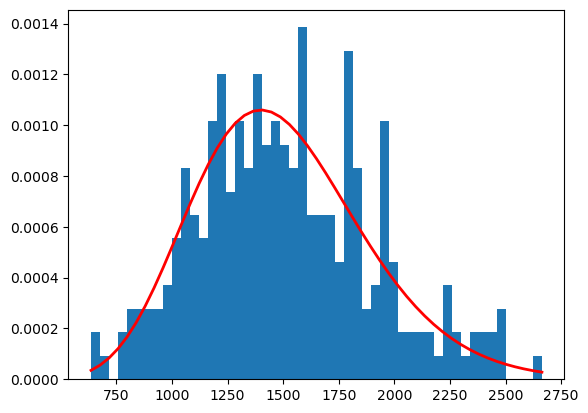

[2180.83832847 1244.63524628 1273.54863824 1092.93173265 2241.49471475
 1194.03459101 2100.89282594  810.70957427 1945.12451157 1084.47891482
 1401.61778233 1155.50608462 1084.25098243 1950.1928998  1839.42663839
 1220.09250964 1366.44688487 1679.29751283 1218.92595796 1166.20604293
 1079.03318962 1558.28519223 1394.41911197 1152.31715343 1486.21072979
 1235.99138989 1513.16699226 1715.9628326  1584.65271069 1335.85897535
 1388.11201046 1702.9923678  1578.77948224 1832.43642283 1672.00424264
 1355.44216341 1944.13536425 2129.10200111 2472.99941636  994.22217825
 1528.81389086 1828.45336319 1590.89690651  820.53518297 1556.56280893
 1778.2780109  1383.15850249 1391.11781473 1543.92797811 1512.71724008
 1513.81709066 1943.14404628 1327.58698373 1235.39874858 1338.88259496
 1483.42642802 1302.00714446 1987.37369277 1086.03899123 1532.49624658
 1768.95176643 1130.90641115 1001.14737695 1590.70464623 1605.05329711
 1019.31779408 1451.89727024  930.81743722 1457.25927571 1189.38110162
  863.

In [14]:
shape, scale = 15, 100.
fcount = len(clusterFlightabs[7])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)

# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[7]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

# print(df["ARR_DELAY_NEW"])

# df.to_excel("testDataDay1_AA_20_revised_withdelay.xlsx")

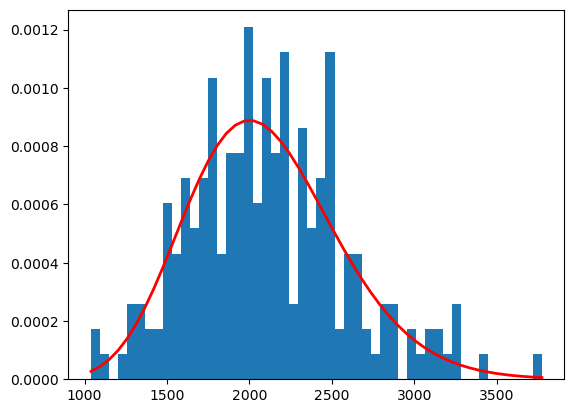

[2896.54552931 1800.84683472 1835.73539569 1616.25764113 2965.67519516
 1739.57258777 2805.15491863 1264.46340968 2626.12023396 1605.89074257
 1989.26663212 1692.72360391 1605.61106905 2631.9668336  2503.84823566
 1771.16222777 1947.25959479 2317.26690657 1769.74964414 1705.75156935
 1599.20698516 2175.07564778 1980.67800707 1688.83823834 2089.85033416
 1790.39945944 2121.77434009 2360.14047916 2206.15135404 1910.63214302
 1973.14921658 2344.98448156 2199.23404166 2495.73801745 2308.72751449
 1934.09225615 2624.97903862 2837.43942557 3227.97261718 1494.59889686
 2140.27755586 2491.11541053 2213.50269133 1276.93455413 2173.04383797
 2432.79741559 1967.23365327 1976.73770066 2158.13203258 2121.24219297
 2122.5435079  2623.83528246 1900.71142084 1789.68287085 1914.2567591
 2086.54948554 1869.99061685 2674.81176441 1607.80477937 2144.62925275
 2421.93979362 1662.72005478 1503.17835894 2213.27638618 2230.1581687
 1525.65647724 2049.125318   1415.71407893 2055.49583709 1733.92321399
 1331.86

In [15]:
shape, scale = 21., 100.
fcount = len(clusterFlightabs[8])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)

# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[8]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

# print(df["ARR_DELAY_NEW"])
                        
# df.to_excel("testDataDay1_AA_20_revised_withdelay.xlsx")

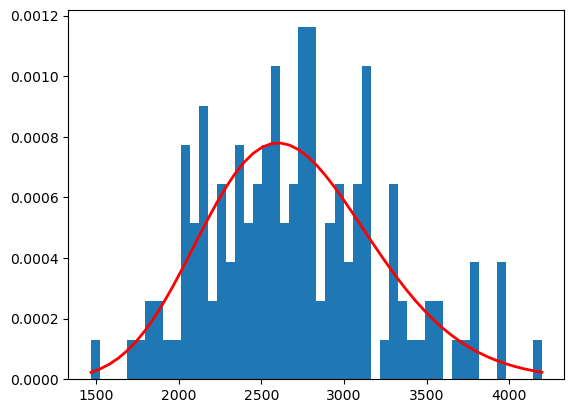

[3596.49881484 2363.06767131 2403.11311702 2150.07748393 3672.97228371
 2292.57930054 3495.19637818 1738.01615432 3296.03572505 2138.05628292
 2578.61249587 2238.54517063 2137.73188831 3302.55504969 3159.44240584
 2328.94466529 2530.70820296 2950.02394182 2327.31969236 2253.58371841
 2130.3024316  2789.55934187 2568.82484601 2234.05829287 2692.98982008
 2351.06359838 2729.19899966 2998.25560183 2824.69675865 2488.87027899
 2560.24217063 2981.21325927 2816.87870381 3150.36480913 2940.40917593
 2515.67516854 3294.76309504 3531.00929313 3962.00532956 2008.57248334
 2750.16612252 3145.18982694 2833.00325303 1752.78541469 2787.26060052
 3079.84026419 2553.49668563 2564.33330249 2770.38455377 2728.59577792
 2730.07087788 3293.48756801 2477.52706983 2350.24002235 2493.01341145
 2689.24340236 2442.370487   3350.29721409 2140.27625297 2755.09521137
 3067.66045938 2203.87381498 2018.58346263 2832.74757634 2851.81480933
 2044.78853209 2646.73426146 1916.28395382 2653.97471443 2286.07004909
 1817.

In [16]:
shape, scale = 27., 100.
fcount = len(clusterFlightabs[9])
s = np.random.gamma(shape, scale, fcount)

import matplotlib.pyplot as plt
import scipy.special as sps  
import math

np.random.seed(1)
count, bins, ignored = plt.hist(s, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()
print(s)

s = sorted(s)

ocount = []
flightSorted = []
clusterSort = []
for key, value in orgCounter.items():
    ocount.append(value)
ocount = sorted(ocount)
ocount.reverse()
# print(ocount)
# print(orgCounter)

for o in ocount:
    for key, value in orgCounter.items():
        if value == o:
            if key not in flightSorted:
                flightSorted.append(key)

# print(flightSorted)

scounter = 0
for fs in flightSorted:
    for cl in clusterFlight[9]:
        if fs == cl.split("-")[0]:
            for i, r in df.iterrows():
                if r["ORIGIN"] == cl.split("-")[0] and r["DEST"] == cl.split("-")[1]:
                    if r["Flag"] == 0:
                        df.loc[i, "ARR_DELAY_NEW"] = s[scounter]
                        df.loc[i, "Flag"] = 1
                        scounter+=1

# print(df["ARR_DELAY_NEW"])
                        
df.drop('Flag', inplace=True, axis=1)
# df.to_excel("testDataDay1_AA_20_revised_withdelay.xlsx")

In [17]:
airport_res = []
airport_res.append(('ORIGIN', 'COUNT', 'CLUSTER_ID'))
print(ocount)
ffcounter = 0
for f in flightSorted:
    for key, value in clusterRank.items():
        if f in value:
            airport_res.append((f, ocount[ffcounter], key))
        
    ffcounter+=1
    
print(airport_res)

pd.DataFrame(airport_res).to_excel('Indigo_airport_res_full_9.xlsx', header=False, index=False)

[142, 108, 104, 90, 90, 87, 27, 23, 22, 21, 20, 17, 17, 16, 15, 14, 14, 14, 13, 12, 12, 10, 9, 9, 9, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 5, 5, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
[('ORIGIN', 'COUNT', 'CLUSTER_ID'), ('Delhi (DEL)', 142, 9), ('Mumbai (BOM)', 108, 8), ('Hyderabad (HYD)', 104, 8), ('Bengaluru (BLR)', 90, 7), ('Chennai (MAA)', 90, 7), ('Kolkata (CCU)', 87, 7), ('Ahmedabad (AMD)', 27, 6), ('Lucknow (LKO)', 23, 5), ('Goa (GOI)', 22, 5), ('Kochi (COK)', 21, 5), ('Guwahati (GAU)', 20, 5), ('Coimbatore (CJB)', 17, 4), ('Pune (PNQ)', 17, 4), ('Patna (PAT)', 16, 4), ('Visakhapatnam (VTZ)', 15, 4), ('Bhubaneshwar (BBI)', 14, 3), ('Jaipur (JAI)', 14, 3), ('Raipur (RPR)', 14, 3), ('Thiruvananthapuram (TRV)', 13, 3), ('Indore (IDR)', 12, 3), ('Nagpur (NAG)', 12, 3), ('Ranchi (IXR)', 10, 2), ('Bagdogra (IXB)', 9, 2), ('Madurai (IXM)', 9, 2), ('Varanasi (VNS)', 9, 2), ('Agartala (IXA)', 8, 2), ('Mangalore (IXE)', 8, 2), ('Vijayawada (VGA)', 8, 2), ('Bhopal (BHO)', 7

In [18]:
adf = pd.read_excel("Indigo_airport_res_full_9.xlsx",index_col=False)
cid = []

list_zeroes = list(np.zeros(len(df)))
df["CLUSTER_ID"] = list_zeroes

for i, r in adf.iterrows():
    for ii, rr in df.iterrows():
        if r["ORIGIN"] == rr["ORIGIN"]:
            df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
#             cid.insert(ii, r["CLUSTER_ID"])

# df["CLUSTER_ID"] = cid
df.to_excel('Indigo_Fleet_cluster9.xlsx')       

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii

C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii] = r["CLUSTER_ID"]
C:\Users\Dhawal\AppData\Local\Temp\ipykernel_12636\808294306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["CLUSTER_ID"][ii